Importing the Libraries

In [1]:
import sys
sys.path.append('../utils')
import warnings
warnings.filterwarnings('ignore')

import os
import time 
import copy 
import re

from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 

import model_functions
import model_utils
import plotting_utils
import scoring_utils

### Sample Pipeline

Load in Sample Data

In [2]:
housing_prices = datasets.load_boston()
X = housing_prices.data
y = housing_prices.target

In [3]:
_ = 'random_forest'
model = model_utils.get_model(_)
param_grid = model_utils.get_param_grid(_)
cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
model_utils.random_forest_feature_importance(cv, X, y)
model_utils.plot_cross_val_results(y, y_pred, 'Housing Price', nested_scores)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### Internet Data Test

In [12]:
internet_data_dir = '../data/internet/'
ndhs_data_dir = '../data/ndhs/'
ntl_data_dir = '../data/nightlights/'

dhs_indicators_path = ndhs_data_dir + 'dhs_indicators.csv'
ntl_summary_stats_path = ntl_data_dir + 'nightlights_summary_stats.csv'

fixed_dlspeed_summary_stats_path = internet_data_dir + 'summary_stats/imputed_fixed download_speeds_summary_stats.csv'
fixed_ulspeed_summary_stats_path = internet_data_dir + 'summary_stats/imputed_fixed upload_speeds_summary_stats.csv'
fixed_latency_summary_stats_path = internet_data_dir + 'summary_stats/imputed_fixed latency_summary_stats.csv'
mobile_dlspeed_summary_stats_path = internet_data_dir + 'summary_stats/imputed_mobile download_speeds_summary_stats.csv'
mobile_ulspeed_summary_stats_path = internet_data_dir + 'summary_stats/imputed_mobile upload_speeds_summary_stats.csv'
mobile_latency_summary_stats_path = internet_data_dir + 'summary_stats/imputed_mobile latency_summary_stats.csv'

In [13]:
fixed_dlspeed_summary_stats = pd.read_csv(fixed_dlspeed_summary_stats_path).drop('Unnamed: 0', 1)
fixed_ulspeed_summary_stats = pd.read_csv(fixed_ulspeed_summary_stats_path).drop('Unnamed: 0', 1)
fixed_latency_summary_stats = pd.read_csv(fixed_latency_summary_stats_path).drop('Unnamed: 0', 1)
mobile_dlspeed_summary_stats = pd.read_csv(mobile_dlspeed_summary_stats_path).drop('Unnamed: 0', 1)
mobile_ulspeed_summary_stats = pd.read_csv(mobile_ulspeed_summary_stats_path).drop('Unnamed: 0', 1)
mobile_latency_summary_stats = pd.read_csv(mobile_latency_summary_stats_path).drop('Unnamed: 0', 1)
ntl_summary_stats = pd.read_csv(ntl_summary_stats_path)

dhs_indicators = pd.read_csv(dhs_indicators_path)
dlspeeds = fixed_dlspeed_summary_stats.merge(dhs_indicators, left_on='DHS Cluster Number', right_on='cluster_number')
ulspeeds = fixed_ulspeed_summary_stats.merge(dhs_indicators, left_on='DHS Cluster Number', right_on='cluster_number')
latency = fixed_latency_summary_stats.merge(dhs_indicators, left_on='DHS Cluster Number', right_on='cluster_number')


# Define feature columns
feature_cols_internet = ['Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis']
feature_cols_nightlights = ['ntl_cov', 'ntl_kurtosis', 'ntl_max', 'ntl_mean', 'ntl_median','ntl_min', 'ntl_skewness', 'ntl_std']
feature_cols_internet_and_nightlights = feature_cols_internet + feature_cols_nightlights


In [4]:
osm_roads_file = '../data/osm/osm_roads.csv'
osm_buildings_file = '../data/osm/osm_buildings.csv'
osm_pois_file = '../data/osm/osm_pois.csv'

roads = pd.read_csv(osm_roads_file)
buildings = pd.read_csv(osm_buildings_file)
pois = pd.read_csv(osm_pois_file)

road_cols = roads.columns[1:]
building_cols = buildings.columns[1:]
poi_cols = pois.columns[1:]

osm_cols = list(road_cols) + list(building_cols) + list(poi_cols)
osm_ntl_internet_cols = list(osm_cols) + feature_cols_internet_and_nightlights

osm = roads.merge(buildings, on='DHSCLUST')
osm = osm.merge(pois, on='DHSCLUST')

ntl_summary_stats.columns = ['DHSCLUST', 'ntl_cov', 'ntl_kurtosis', 'ntl_max', 'ntl_mean', 'ntl_median','ntl_min', 'ntl_skewness', 'ntl_std']
osm_internet_cols = list(osm_cols) + feature_cols_internet

### Download Speed Only Predicting Wealth Index

Best estimator: Pipeline(steps=[('regressor',
                 RandomForestRegressor(bootstrap=False, max_depth=8,
                                       max_features='sqrt', min_samples_leaf=9,
                                       min_samples_split=3, n_estimators=764,
                                       n_jobs=-1, random_state=42))])


AttributeError: module 'model_utils' has no attribute 'rf_feature_importance'

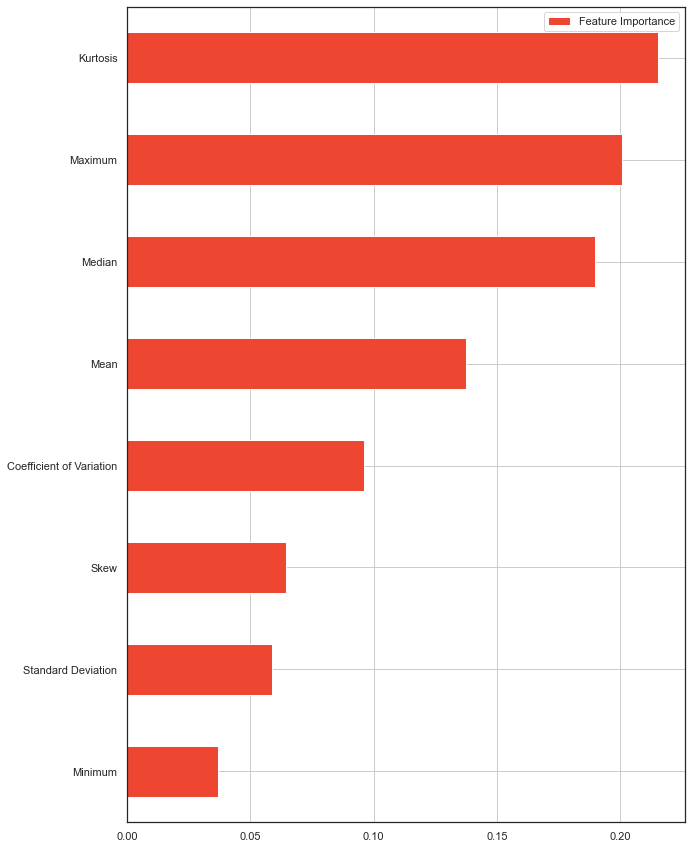

In [11]:
model_utils.random_forest_feature_importance(cv, X, y)

Model Type : ridge


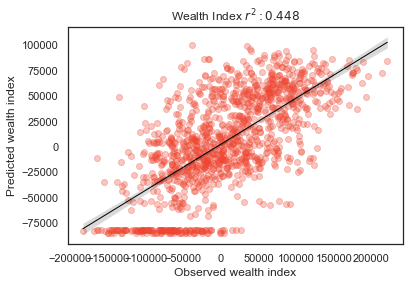

Model Type : lasso


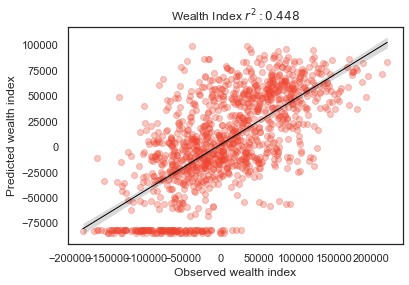

Model Type : elastic_net


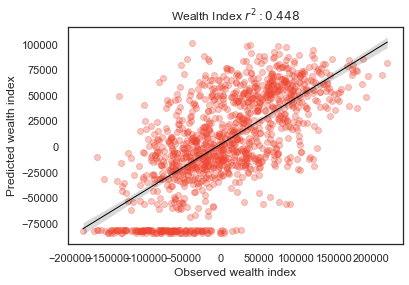

Model Type : random_forest


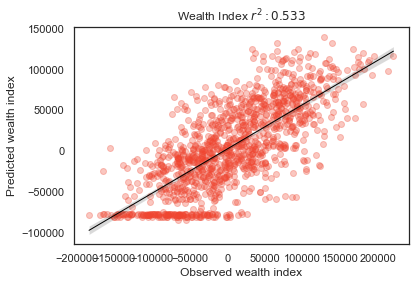

In [9]:
X = dlspeeds[feature_cols_internet]
y = dlspeeds['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Upload Speeds Only Predicting Wealth Index

Model Type : ridge


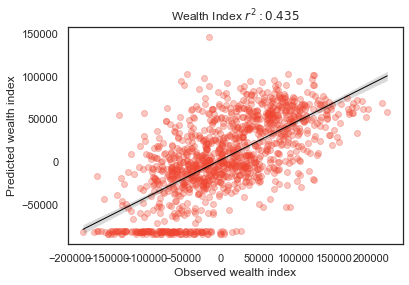

Model Type : lasso


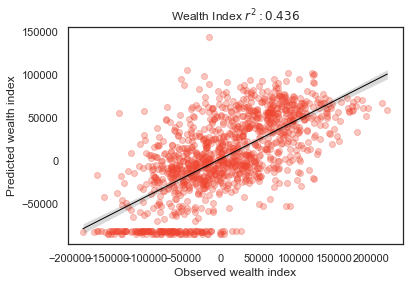

Model Type : elastic_net


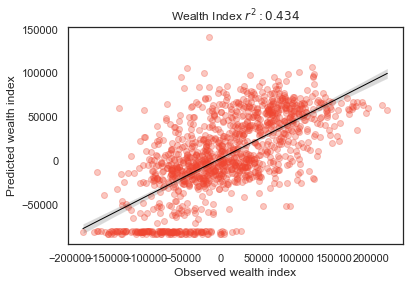

Model Type : random_forest


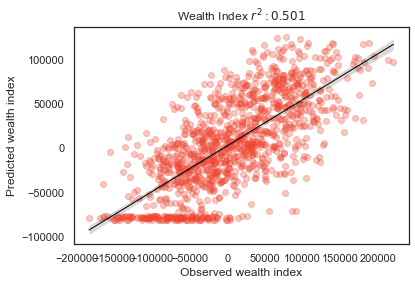

Model Type : xgboost


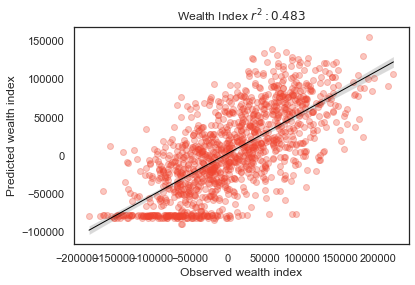

In [38]:
X = ulspeeds[feature_cols_internet]
y = ulspeeds['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Latency Only Predicting Wealth Index

Model Type : ridge


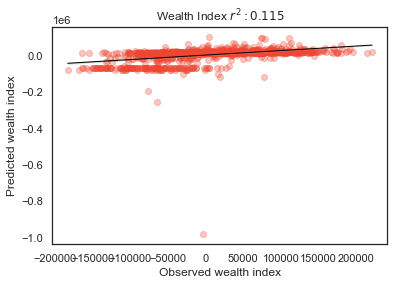

Model Type : lasso


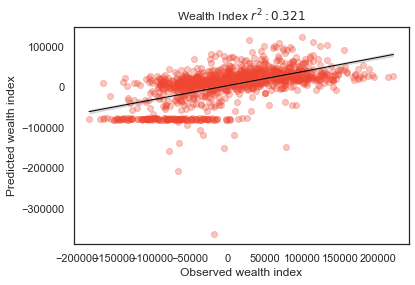

Model Type : elastic_net


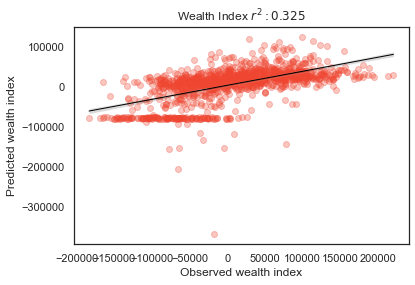

Model Type : random_forest


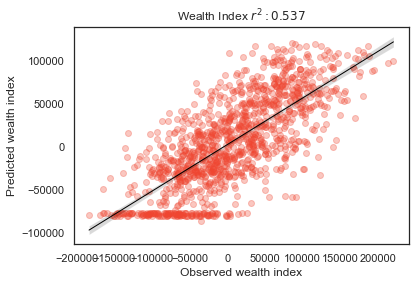

Model Type : xgboost


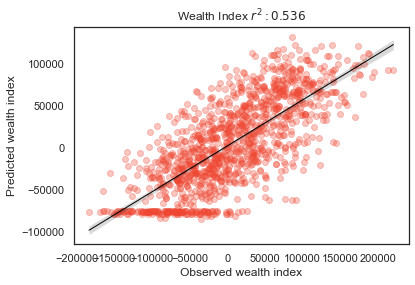

In [39]:
X = latency[feature_cols_internet]
y = latency['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Download Speed and Nightlights Predicting Wealth Index

In [4]:
dl_ntl = dlspeeds.merge(ntl_summary_stats, left_on='DHS Cluster Number', right_on='DHSCLUST')

In [13]:
X = dl_ntl[feature_cols_internet_and_nightlights]
y = dl_ntl['wealth_index']

model_types = ['random_forest']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

Model Type : random_forest


Model Type : ridge


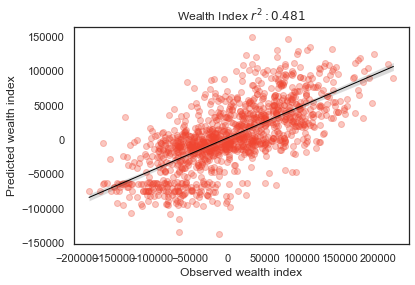

Model Type : lasso


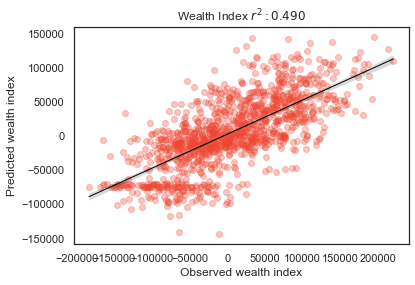

Model Type : elastic_net


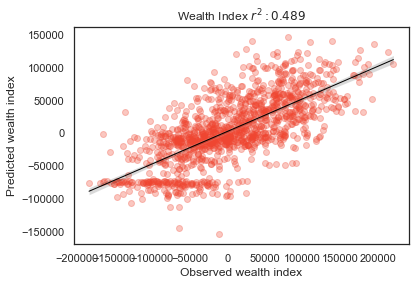

Model Type : random_forest


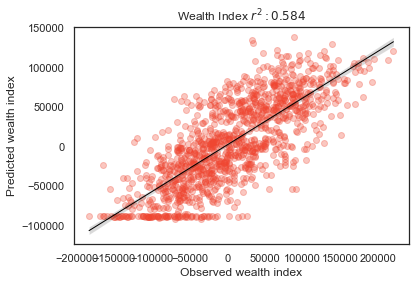

Model Type : xgboost


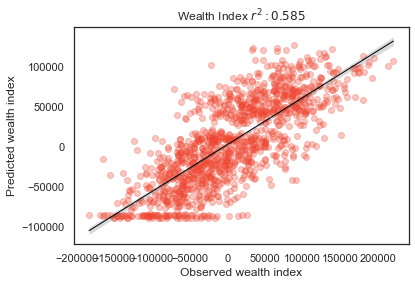

In [67]:
X = dl_ntl[feature_cols_internet_and_nightlights]
y = dl_ntl['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Upload Speed and Nightlights Predicting Wealth Index

Model Type : ridge


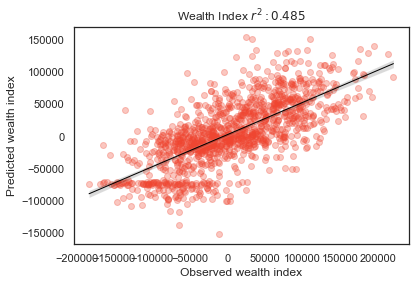

Model Type : lasso


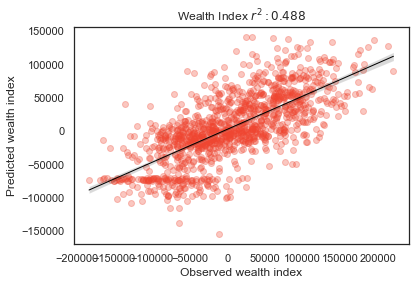

Model Type : elastic_net


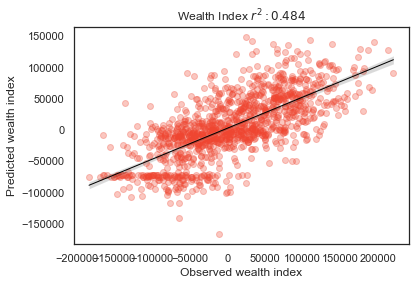

Model Type : random_forest


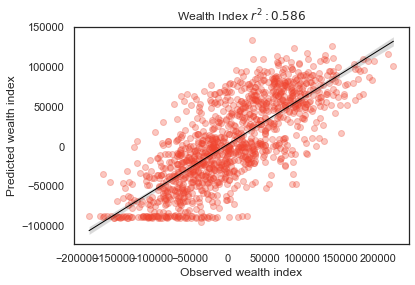

Model Type : xgboost


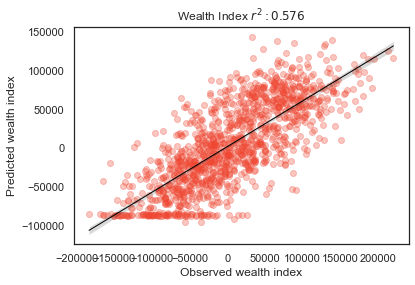

In [5]:
ntl_summary_stats.columns = ['DHSCLUST', 'ntl_cov', 'ntl_kurtosis', 'ntl_max', 'ntl_mean', 'ntl_median','ntl_min', 'ntl_skewness', 'ntl_std']
ul_ntl = ulspeeds.merge(ntl_summary_stats, left_on='DHS Cluster Number', right_on='DHSCLUST')

X = ul_ntl[feature_cols_internet_and_nightlights]
y = ul_ntl['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)


### Latency and Nightlights Predicting Wealth Index

Model Type : ridge


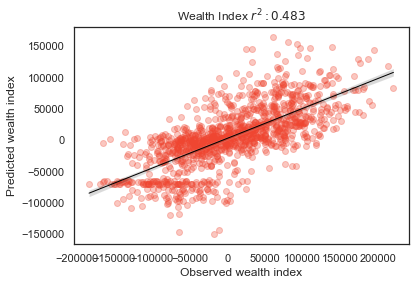

Model Type : lasso


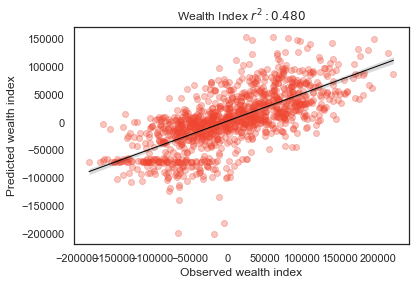

Model Type : elastic_net


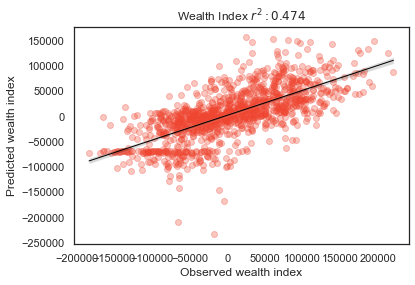

Model Type : random_forest


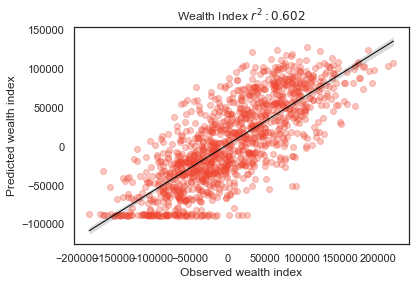

Model Type : xgboost


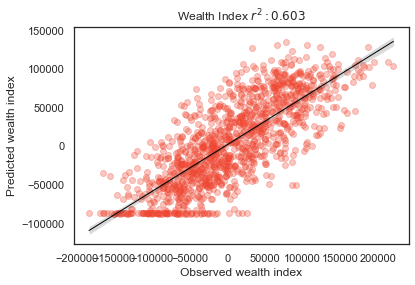

In [6]:
ntl_summary_stats.columns = ['DHSCLUST', 'ntl_cov', 'ntl_kurtosis', 'ntl_max', 'ntl_mean', 'ntl_median','ntl_min', 'ntl_skewness', 'ntl_std']
latency_ntl = latency.merge(ntl_summary_stats, left_on='DHS Cluster Number', right_on='DHSCLUST')

X = latency_ntl[feature_cols_internet_and_nightlights]
y = latency_ntl['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)


### Download Speed and OSM Predicting Wealth Index

In [5]:
dl_osm = dlspeeds.merge(osm, left_on='DHS Cluster Number', right_on='DHSCLUST')

NameError: name 'osm' is not defined

In [ ]:
X = osm_ntl_dl[osm_ntl_internet_cols]
y = osm_ntl_dl['wealth_index']

model_types = ['xgboost']#['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

Model Type : ridge


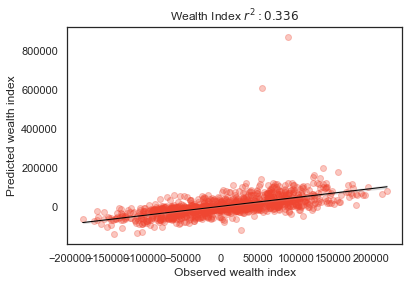

Model Type : lasso


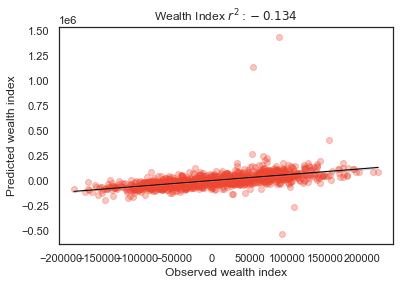

Model Type : elastic_net


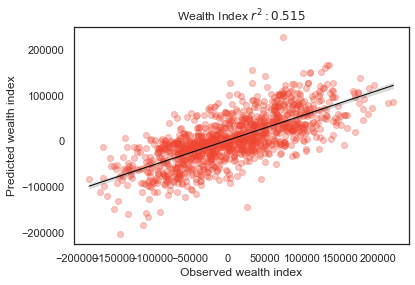

Model Type : random_forest


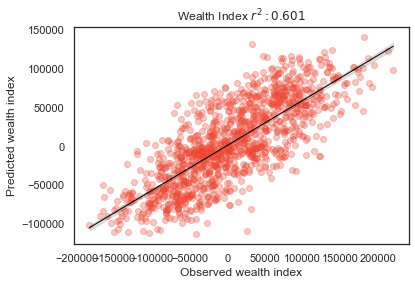

In [12]:
X = dl_osm[osm_internet_cols]
y = dl_osm['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

In [15]:
X = dl_osm[osm_internet_cols]
y = dl_osm['wealth_index']

model_types = ['xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

Model Type : xgboost


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


### Upload Speeds and OSM Predicting Wealth Index

In [9]:
ul_osm = ulspeeds.merge(osm, left_on='DHS Cluster Number', right_on='DHSCLUST')
osm_internet_cols = list(osm_cols) + feature_cols_internet

In [15]:
X = ul_osm[osm_internet_cols]
y = ul_osm['wealth_index']

Model Type : ridge


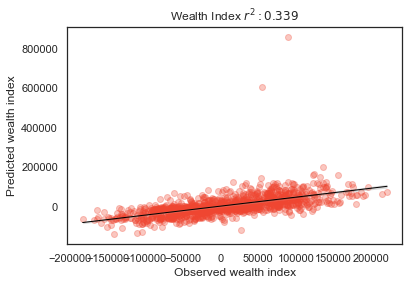

Model Type : lasso


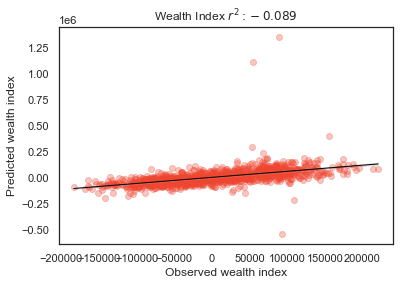

Model Type : elastic_net


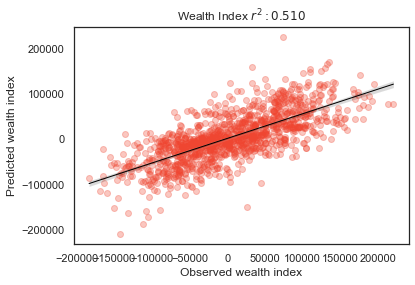

Model Type : random_forest


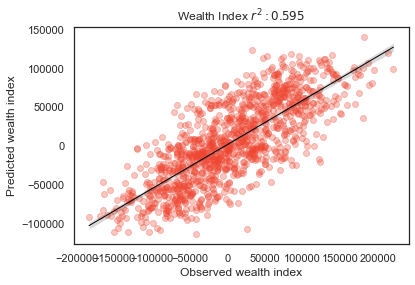

Model Type : xgboost


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [16]:
model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Latency and OSM Predicting Wealth Index

In [18]:
latency_osm = latency.merge(osm, left_on='DHS Cluster Number', right_on='DHSCLUST')

Model Type : ridge


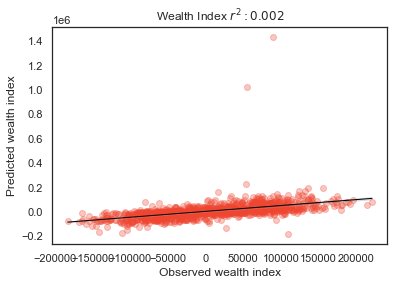

Model Type : lasso


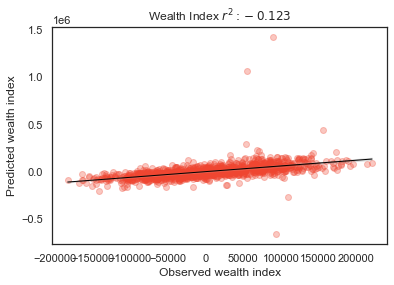

Model Type : elastic_net


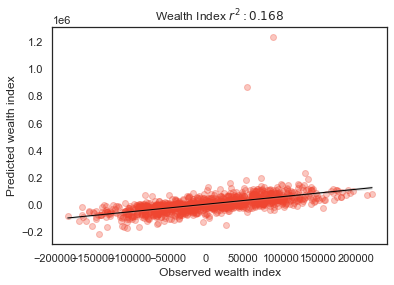

Model Type : random_forest


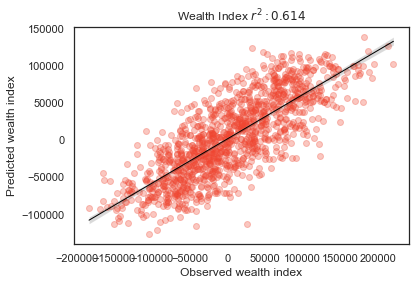

In [19]:
X = latency_osm[osm_internet_cols]
y = latency_osm['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net', 'random_forest']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Download Speed, Nightlights, and OSM Predicting Wealth Index

In [9]:
osm_ntl_dl = osm.merge(dl_ntl, left_on='DHSCLUST', right_on='DHS Cluster Number')

NameError: name 'dl_ntl' is not defined

Model Type : ridge


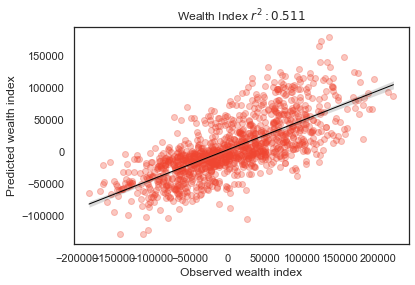

Model Type : lasso


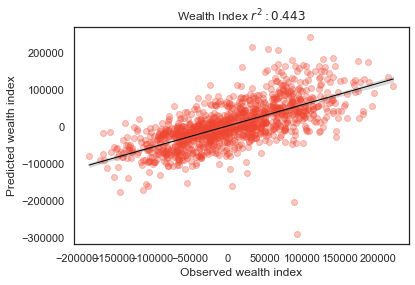

Model Type : elastic_net


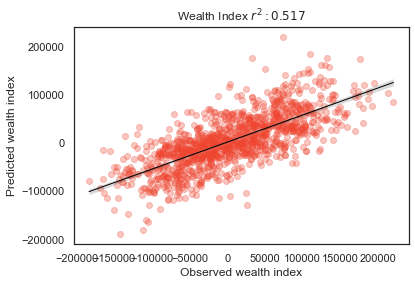

In [8]:
X = osm_ntl_dl[osm_ntl_internet_cols]
y = osm_ntl_dl['wealth_index']

model_types = ['ridge', 'lasso', 'elastic_net']#['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

Model Type : random_forest


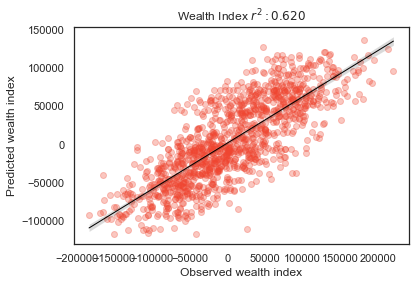

Model Type : xgboost


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [9]:
X = osm_ntl_dl[osm_ntl_internet_cols]
y = osm_ntl_dl['wealth_index']

model_types = ['random_forest', 'xgboost']#['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

### Latency, OSM, and Nightlights in Predicting Wealth Index

In [5]:
latency_ntl_dl = osm.merge(latency, left_on='DHSCLUST', right_on='DHS Cluster Number').merge(ntl_summary_stats, on='DHSCLUST')

In [6]:
X = latency_ntl_dl[osm_ntl_internet_cols]
y = latency_ntl_dl['wealth_index']

Model Type : ridge


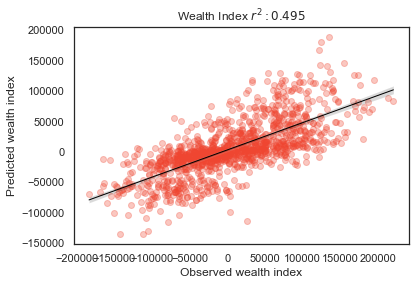

Model Type : lasso


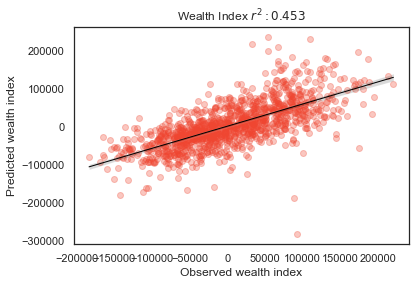

Model Type : elastic_net


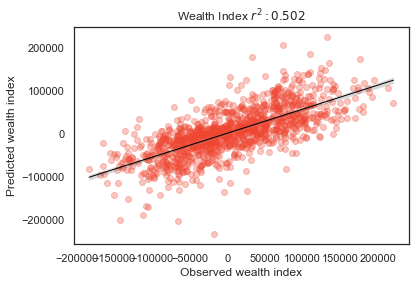

In [7]:
model_types = ['ridge', 'lasso', 'elastic_net']#['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

In [10]:
latency.head(5)

,DHS Cluster Number,Mean,Maximum,Minimum,Standard Deviation,Median,Skew,Coefficient of Variation,Kurtosis,Number of Datapoints,cluster_number,wealth_index,education_completed_yrs,electricity_access
0,1,61.125,92.0,38.0,18.624161,57.0,0.67834,3.964107e+02,-0.948613,8,1,-31881.608696,9.391304,0.913043
1,2,61.375,92.0,38.0,18.540075,58.0,0.65161,3.928393e+02,-0.949377,8,2,-2855.375000,9.708333,0.958333
2,3,56.000,56.0,56.0,0.000000,56.0,0.00000,1.533253e+07,-3.000000,1,3,-57647.047619,8.428571,0.857143
3,4,82.000,82.0,82.0,0.000000,82.0,0.00000,1.533253e+07,-3.000000,1,4,-54952.666667,6.714286,0.809524
4,6,82.000,82.0,82.0,0.000000,82.0,0.00000,1.533253e+07,-3.000000,1,6,-80701.695652,8.086957,0.869565


Model Type : random_forest
{'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021780F5B700>, 'regressor__max_features': ['auto', 'sqrt', 'log2'], 'regressor__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021780FEC490>, 'regressor__min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021780FD4A00>, 'regressor__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021780FF00A0>, 'regressor__bootstrap': [True, False]}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 75.2min remaining: 50.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 75.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 76.3min remaining: 50.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 76.5min finished


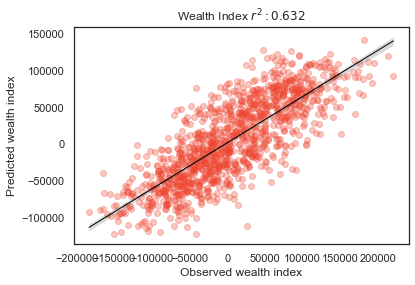

In [7]:
X = latency_ntl_dl[osm_ntl_internet_cols]
y = latency_ntl_dl['wealth_index']

model_types = ['random_forest']#['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    print(param_grid)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid, n_iter=150, verbose=2)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)

Model Type : xgboost


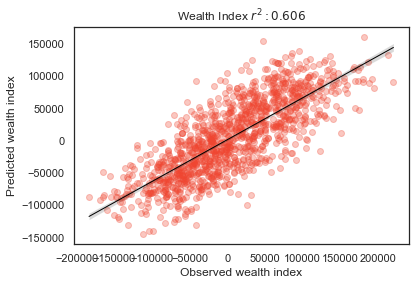

In [27]:
X = latency_ntl_dl[osm_ntl_internet_cols]
y = latency_ntl_dl['wealth_index']

model_types = ['xgboost']#['ridge', 'lasso', 'elastic_net', 'random_forest', 'xgboost']
for _ in model_types:
    print('Model Type : {}'.format(_))
    model = model_utils.get_model(_)
    param_grid = model_utils.get_param_grid(_)
    cv, nested_scores, y, y_pred = model_utils.nested_cross_validation(model, X, y, param_grid)
    model_utils.plot_cross_val_results(y, y_pred, 'Wealth Index', nested_scores)